In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import uniform, randint
import seaborn as sns
import math
import time

df = pd.read_csv('StudentsPerformance.csv') # Training set is already available
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df_encoded = df.copy() 

# Calculate mean score for each row
df_encoded["mean score"] = (df_encoded["math score"] + 
                           df_encoded["reading score"] + 
                           df_encoded["writing score"]) / 3

df_encoded["std score"] = np.sqrt(
    ((df_encoded["math score"] - df_encoded["mean score"])**2 + 
     (df_encoded["reading score"] - df_encoded["mean score"])**2 + 
     (df_encoded["writing score"] - df_encoded["mean score"])**2) / 3
)

df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,std score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0.942809
1,female,group C,some college,standard,completed,69,90,88,82.333333,9.463380
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2.054805
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,5.557777
4,male,group C,some college,standard,none,76,78,75,76.333333,1.247219


In [13]:
le = LabelEncoder()
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])
df_encoded['lunch'] = le.fit_transform(df_encoded['lunch'])
df_encoded['test preparation course'] = le.fit_transform(df_encoded['test preparation course'])
df_encoded = pd.get_dummies(df_encoded, dtype=int)
df_encoded.head()

,gender,lunch,test preparation course,math score,reading score,writing score,mean score,std score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,72.666667,0.942809,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,69,90,88,82.333333,9.463380,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,90,95,93,92.666667,2.054805,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,47,57,44,49.333333,5.557777,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,76,78,75,76.333333,1.247219,0,0,1,0,0,0,0,0,0,1,0


            gender        lunch  test preparation course  math score  \
count  1000.000000  1000.000000              1000.000000  1000.00000   
mean      0.482000     0.645000                 0.642000    66.08900   
std       0.499926     0.478753                 0.479652    15.16308   
min       0.000000     0.000000                 0.000000     0.00000   
25%       0.000000     0.000000                 0.000000    57.00000   
50%       0.000000     1.000000                 1.000000    66.00000   
75%       1.000000     1.000000                 1.000000    77.00000   
max       1.000000     1.000000                 1.000000   100.00000   

       reading score  writing score   mean score    std score  \
count    1000.000000    1000.000000  1000.000000  1000.000000   
mean       69.169000      68.054000    67.770667     4.212882   
std        14.600192      15.195657    14.257326     2.291188   
min        17.000000      10.000000     9.000000     0.000000   
25%        59.000000      

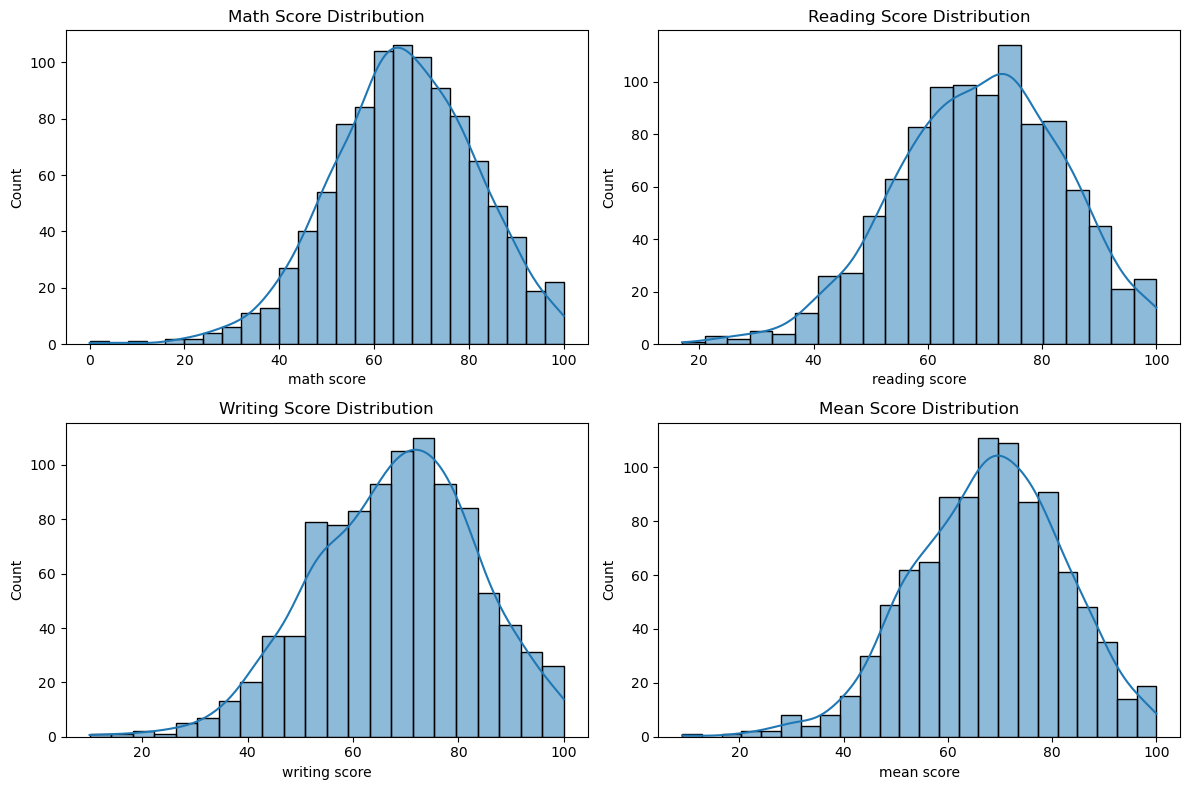

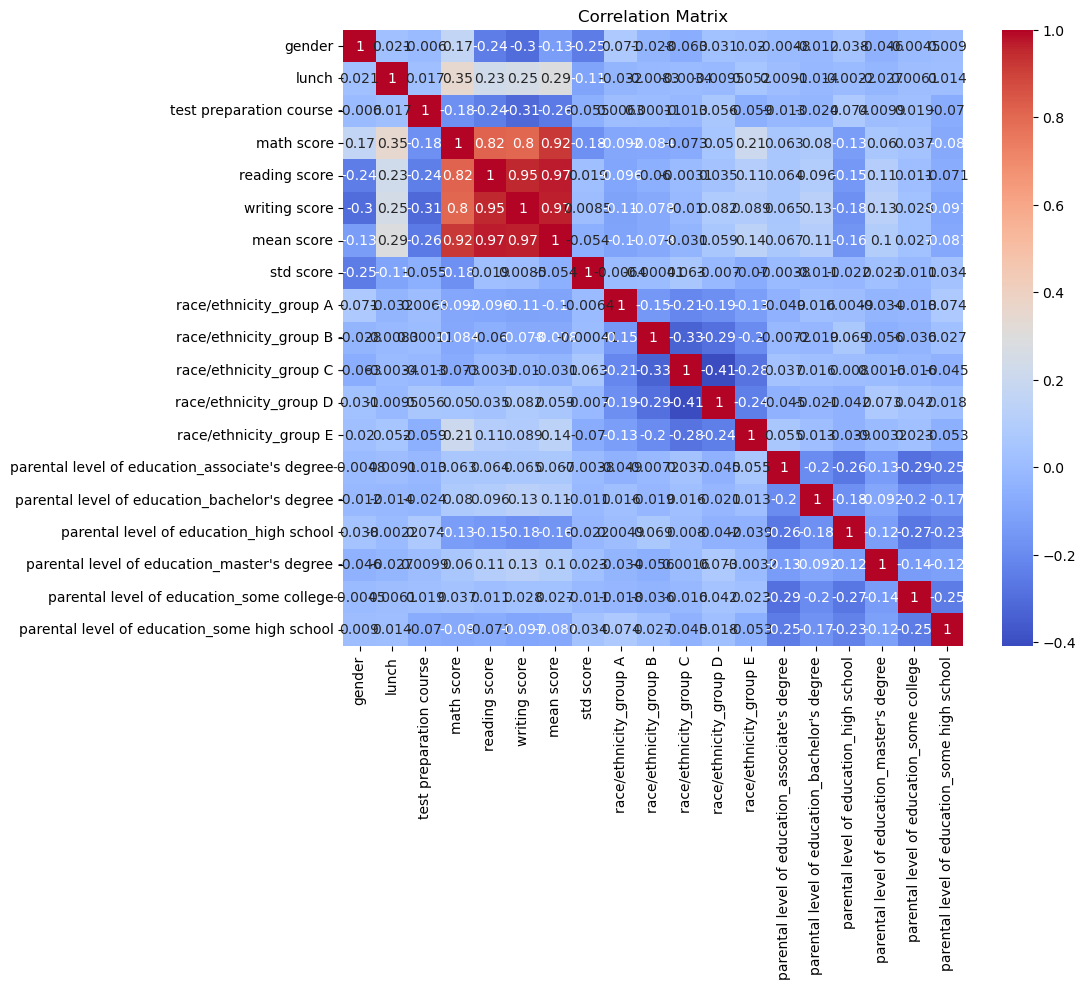

In [14]:
# Basic statistics
print(df_encoded.describe())

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_encoded["math score"], kde=True)
plt.title("Math Score Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df_encoded["reading score"], kde=True)
plt.title("Reading Score Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df_encoded["writing score"], kde=True)
plt.title("Writing Score Distribution")

plt.subplot(2, 2, 4)
sns.histplot(df_encoded["mean score"], kde=True)
plt.title("Mean Score Distribution")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [15]:
X = df_encoded.drop(["math score", "reading score", "writing score", "mean score", "std score"], axis='columns')
y = df_encoded['mean score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
param_dist_svr = {
    'C': uniform(0.1, 100),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 0.1).rvs(10)),
    'epsilon': uniform(0.05, 0.3),
    'degree': randint(2, 4)
}

random_search_svr = RandomizedSearchCV(
    SVR(),
    param_dist_svr,
    n_iter=50,
    cv=5,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit='neg_mean_squared_error'
)

svm = SVR()
svm.fit(X_train, y_train)

#print("\nMillors hiperparàmetres trobats amb Random Search per SVR:")
#print(random_search_svr.best_params_)
#print(f"Millor puntuació de validació (MSE): {random_search_svr.best_score_:.4f}")

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"r2: {r2:.4f}")

MSE: 187.7490
MAE: 10.7508
RMSE: 13.7022
r2: 0.1242
